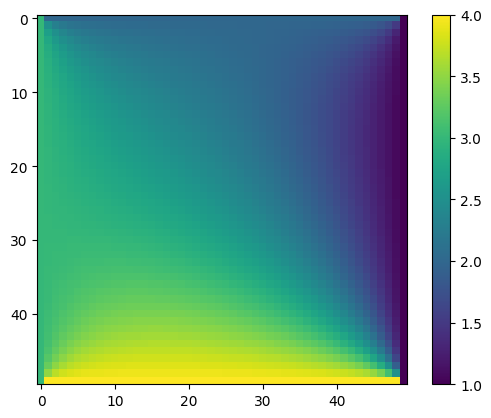

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def matriz_A(M, N):
    n = (M-2)*(N-2)
    A = np.diag(4*np.ones(n))

    for i in range(n-1):
        if (i+1)%(N-2) != 0:
            A[i, i+1] = A[i+1, i] = -1

    for i in range(n-(N-2)):
        A[i, i+(N-2)] = A[i+(N-2), i] = -1
    return A

def matriz_b(M, N, contorno):

    b = []
    for i in range(1, M-1):
        for j in range(1, N-1):
            val = 0
            if i-1 == 0:     val += contorno[i-1, j]
            if i+1 == M-1:   val += contorno[i+1, j]
            if j-1 == 0:     val += contorno[i, j-1]
            if j+1 == N-1:   val += contorno[i, j+1]
            b.append(val)
    return np.array(b)

def resolver_potenciais(M, N, contorno):

    A = matriz_A(M, N)
    b = matriz_b(M, N, contorno)
    V = np.linalg.solve(A, b)

    malha = contorno.copy()
    k = 0
    for i in range(1, M-1):
        for j in range(1, N-1):
            malha[i, j] = V[k]
            k += 1

    plt.imshow(malha)
    plt.colorbar()
    plt.show()


N = 50
M = N


contorno = np.zeros((M, N))
contorno[0, :]  = 2 #topo
contorno[-1, :] = 4 #base
contorno[:, 0]  = 3 #esquerda
contorno[:, -1] = 1 #direita


resolver_potenciais(M, N, contorno)



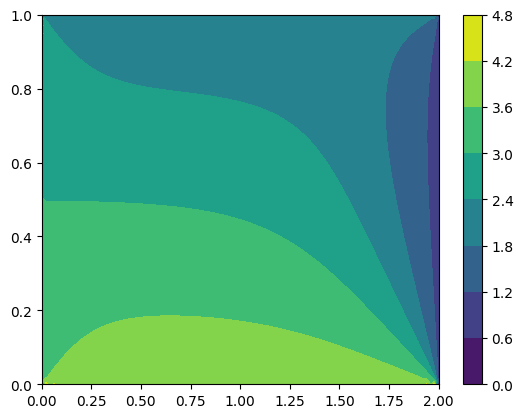

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(1, 100, 2)
a = 2
b = 1
V1 = 4 #base
V2 = 1 #direita
V3 = 2 #topo
V4 = 3 #esquerda

def v1(x,y):
  l = n*np.pi/a
  return 4*V1/np.pi * np.sum(1/n * np.sinh(l*(b-y))/ np.sinh(l*b) * np.sin(l*x))

def v2(x,y):
  l = n*np.pi/b
  return 4*V2/np.pi * np.sum(1/n * np.sinh(l*x)/ np.sinh(l*a) * np.sin(l*y))

def v3(x,y):
  l = n*np.pi/a
  return 4*V3/np.pi * np.sum(1/n * np.sinh(l*y)/ np.sinh(l*b) * np.sin(l*x))

def v4(x,y):
  l = n*np.pi/b
  return 4*V4/np.pi * np.sum(1/n * np.sinh(l*(a-x))/ np.sinh(l*a) * np.sin(l*y))


x = np.linspace(0, a, 100)
y = np.linspace(0, b, 100)

X, Y = np.meshgrid(x, y)
Z = np.zeros((len(x), len(y)))
for i in range(len(x)):
  for j in range(len(y)):
    Z[i][j] = v1(X[i][j], Y[i][j])+v2(X[i][j], Y[i][j])+v3(X[i][j], Y[i][j])+v4(X[i][j], Y[i][j])

plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()